## Regresión polinómica en el dataset Boston Housing Dataset

En este notebook realizaremos otra comparación más entre la regresión lineal y la regresión lineal polinómica.

Al igual que en el Ejercicio 2, vamos a utilizar datos que ya vienen precargados en alguna librería. En este caso, al igual que en dicho ejercicio, serán datos de sklearn, los cuál es ya estamos acostumbreados a majear.

Son unas 506 muestras y 13 variables, y el objetivo consiste en predecir los precios de las viviendas. A continuación, se recogen las descripciones originales de las columnas del dataset:

  **CRIM**: Per capita crime rate by town

  **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft

  **INDUS**: Proportion of non-retail business acres per town

  **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

  **NOX**: Nitric oxide concentration (parts per 10 million)

  **RM**: Average number of rooms per dwelling

  **AGE**: Proportion of owner-occupied units built prior to 1940

  **DIS**: Weighted distances to five Boston employment centers

  **RAD**: Index of accessibility to radial highways

  **TAX**: Full-value property tax rate per $10,000

  **B**: 1000(Bk - 0.63)², where Bk is the proportion of [people of African American descent] by town

  **LSTAT**: Percentage of lower status of the population

  **MEDV**: Median value of owner-occupied homes in $1000s
  
  
  
  
  
  
Pues una vez efinido todo, vamos a darle al Machinne learning:
  

**Comienza importando las librerías necesarias**

In [64]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

**Cargamos los datos de scikit-learn al igual que hicimos en el ejercicio anterior**

In [65]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

**También se trata de un diccionario. Investiga qué tiene. ¿Cuáles son las varaibles que entrarán al modelo? ¿Qué voy a predecir?**


In [66]:
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [67]:
boston_dataset['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [68]:
boston_dataset['target']

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

**Toma los datos que te interesen y transforma esa estrctura de datos en un Dataframe**

In [69]:
df = pd.DataFrame(boston_dataset['data'], columns=boston_dataset['feature_names'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


**Añade, a ese mismo DataFrame, una nueva columna llamada 'MEDV' donde se guarden los datos del target**

In [70]:
df['MDEV'] = boston_dataset['target']

**Data preprocessing**

¿Hay nulos en los datos? En caso afirmativo, ¿cuántas columnas se ven afectadas? ¿Cómo piensas rellenarlos? ¿O mejor eliminar las filas?

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MDEV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


**Data Visualization**

Representa la distribución de la varaible objetivo mediante su histograma:

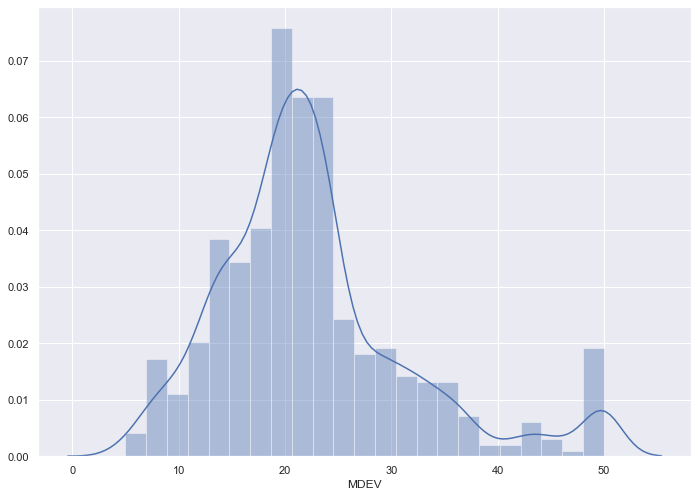

In [72]:
# Establecemos el tamaño de la figura
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Aquí el histograma
sns.distplot(df['MDEV']);

**Matriz de correlación**

Analiza la matriz de correlación mediante un mapa de calor:


* ¿Cuáles son las columnas más correladas con 'MEDV'?

* Identifica las 2 columnas que están altamente correladas entre sí. Elimina una de ellas para evitar la multicolinealidad. Si puedes, utiliza el método VIF para ver si te ayuda a descartar alguna de las 2. Si no, siempre puedes recurrir a ver cuál es la que mejores resultados te da


In [73]:
# Correlación para todos
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


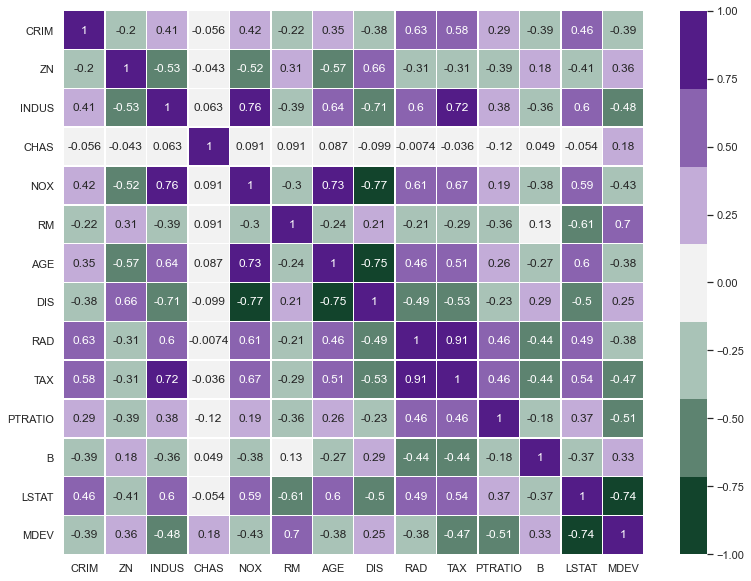

In [74]:
# Asegúrate de que tenemos los valores sobre la gráfica
f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            ax=ax,
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7));

In [75]:
'''
Las columnas mas correlacionadas son LSTAT, RM y PTRATIO

'''
df.corr()['MDEV'].apply(abs).sort_values(ascending=False)

MDEV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MDEV, dtype: float64

In [76]:
# Nos cargamos RAD ya que presenta una menor correlación con el target
df.drop(columns=['RAD'], inplace=True)

### Dibuja 2 gráficos de dispersión para ver la relación entre las 2 variables que mayor relación tienen con el target, y el propio target

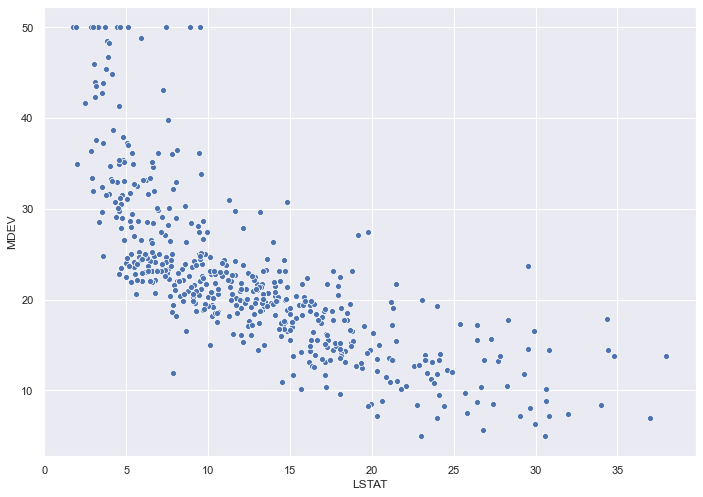

In [77]:
sns.scatterplot(x=df["LSTAT"] ,
                y=df["MDEV"]);

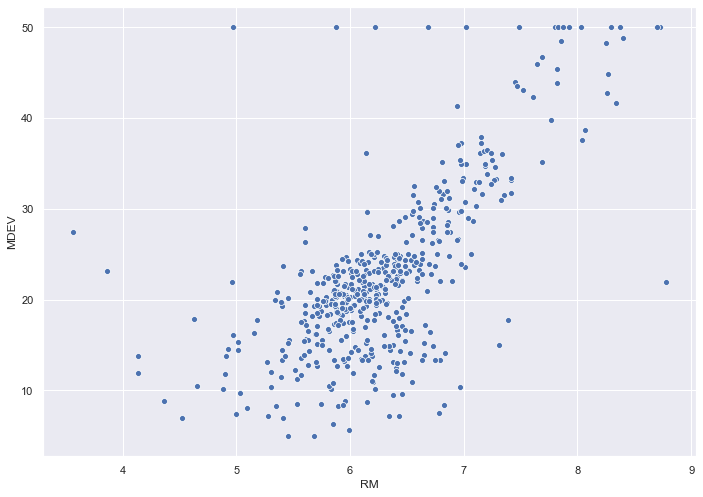

In [78]:
sns.scatterplot(x=df["RM"],
                y=df["MDEV"]);

**¿Preparado para el entrenamiento?**

Créate un dataframe X con las 2 variables más correladas con la variable objetivo. Créate un Series con la variable objetivo.

In [79]:
X = df[['LSTAT', 'RM']]
Y = df['MDEV']

**Divide en train y test**

Separa los datos con un ratio 80%-20% con una semilla fija en 20. Imprime por pantalla los tamaños de cada uno de los sets resultantes

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 2)
(152, 2)
(354,)
(152,)


# **Regresión lineal**

Construye un regresor lineal basándote en el LinearRegression de sklearn.
Usaremos el Mean Squared error y el R2 para evaluar nuestro modelo, así que asegúrate de hacer los imports de librerías, módulos, funciones... y demás elementos necesarios


In [81]:
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

**Evalúa el rendimiento del modelo en train y test**

In [82]:
# Métricas para train:
rmse = mean_squared_error(y_train, lin_reg.predict(X_train))
r2 = r2_score(y_train, lin_reg.predict(X_train))

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# Métricas para test:
rmse = mean_squared_error(y_test, lin_reg.predict(X_test))
r2 = r2_score(y_test, lin_reg.predict(X_test))

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 29.587560001195797
R2 score is 0.6509440237430768


The model performance for testing set
--------------------------------------
RMSE is 32.72507169281494
R2 score is 0.6069792285352373


**Vamos a ver el rendimiento de forma visual, que siempre ayuda. Pinta y_test vs y_pred**

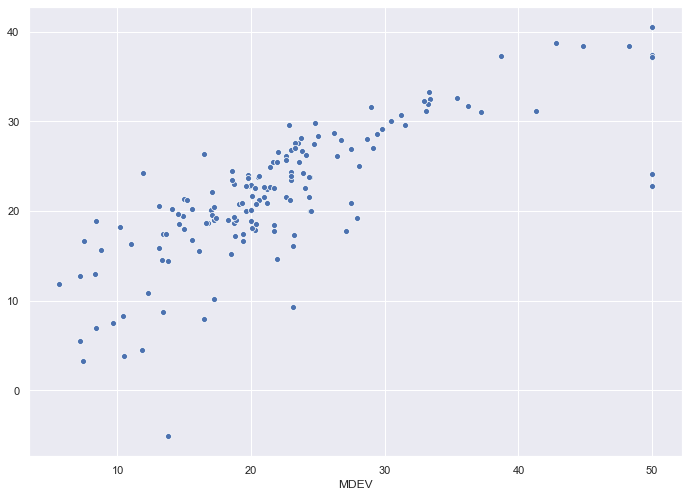

In [83]:
sns.scatterplot(x=y_test,
                y=lin_reg.predict(X_test));

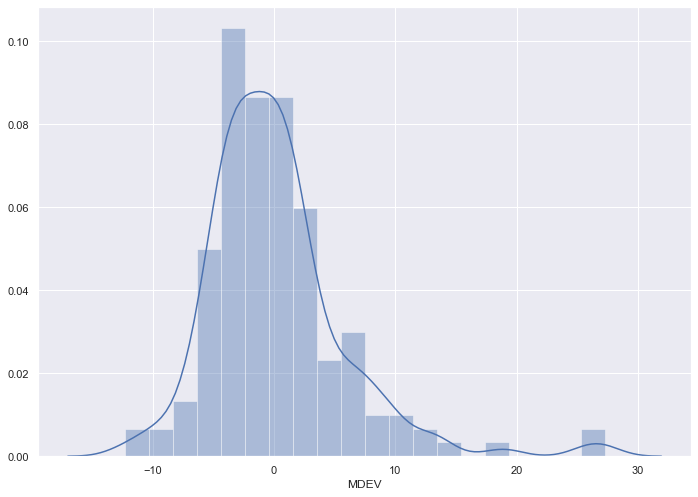

In [84]:
sns.distplot(y_test - lin_reg.predict(X_test));

# **Regresión polinómica**

Hemos visto que, cuando hicimos la representación de las 2 variables más significativas, había una de ellas que se apreciaba a la legua que no era muy lineal. Por lo tanto, vamos crearnos un modelo de regresión polinómica con grado = 2 y veamos qué sucede.

Para generar esos polinomios, puedes usar la función PolyniomialFeatures de sklearn. ¿Qué resultados obtienes? Mídelo en base al RMSE y el R^2

In [86]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
poly_reg.fit(X_train)
X_poly = poly_reg.transform(X_train)

# Linear regression
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

rmse_train = mean_squared_error(y_train, pol_reg.predict(poly_reg.transform(X_train)))
r2_train = r2_score(y_train, pol_reg.predict(poly_reg.transform(X_train)))
  
print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

print("\n")

rmse_test = mean_squared_error(y_test, pol_reg.predict(poly_reg.transform(X_test)))
r2_test = r2_score(y_test, pol_reg.predict(poly_reg.transform(X_test)))

print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The model performance for the training set
-------------------------------------------
RMSE of training set is 19.19596475467115
R2 score of training set is 0.7735377226995257


The model performance for the test set
-------------------------------------------
RMSE of test set is 23.805568624081005
R2 score of test set is 0.7141004599281635


**¿En base a los datos, ha mejorado el modelo al utilizar uno con mayor grado de libertad?**

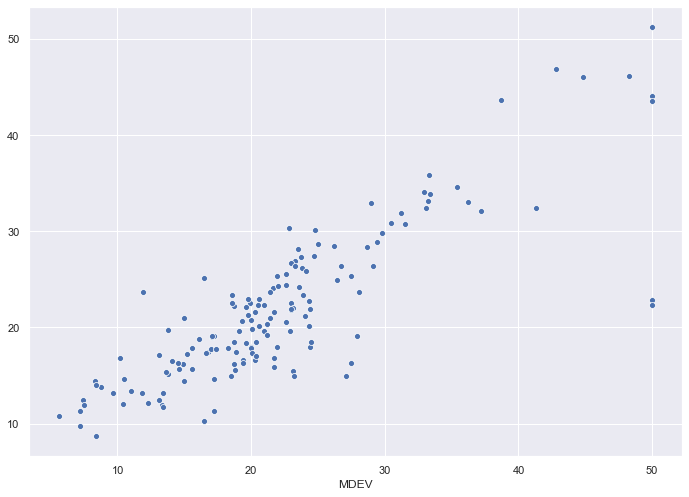

In [87]:
sns.scatterplot(x=y_test,
                y=pol_reg.predict(poly_reg.transform(X_test)));

In [88]:
# y_train = np.log(y_train)

In [92]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg2 = PolynomialFeatures(degree=5)
poly_reg2.fit(X_train)
X_poly2 = poly_reg2.transform(X_train)

# Linear regression
pol_reg2 = LinearRegression()
pol_reg2.fit(X_poly2, y_train)

rmse_train = mean_squared_error(y_train, pol_reg2.predict(poly_reg2.transform(X_train)))
r2_train = r2_score(y_train, pol_reg2.predict(poly_reg2.transform(X_train)))
  
print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

print("\n")

rmse_test = mean_squared_error(y_test, pol_reg2.predict(poly_reg2.transform(X_test)))
r2_test = r2_score(y_test, pol_reg2.predict(poly_reg2.transform(X_test)))

print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The model performance for the training set
-------------------------------------------
RMSE of training set is 12.88462196909696
R2 score of training set is 0.8479950932100258


The model performance for the test set
-------------------------------------------
RMSE of test set is 37.234932845620015
R2 score of test set is 0.5528168075598976


Como puedes ver, en train mejoramos mucho pero en test fallamos. ¡¡Eso es debido al overfitting!!